This notebook shows the results of the trained models in terms of qualitative comparisons of the reconstructed MRI volumes.

All samples shown here were drawn from the test dataset. Note that each model was trained using data volumes with 15 temporal slices. Therefore, sample volumes with a larger temporal dimension were split accordingly and the model ouputs were later re-combined for visualisation purposes.

The discrepancy between the target volume and each model ouput was measured in terms of absolute error between normalised target and output.

All the results shown in this notebook were generated from the following trained models.

>**Random Cartesian subsampling mask with 4x acceleration**: 
- XF-VarNet
- XF-CineNet
- XF-XPDNet
>
>**Random Cartesian subsampling mask with 8x acceleration**:
- 2D-VarNet
- 3D-VarNet
- XT-VarNet
- XF-VarnNet
- CRNN-VarNet

# Models comparison of 'XF' dynamics at 4x acceleration

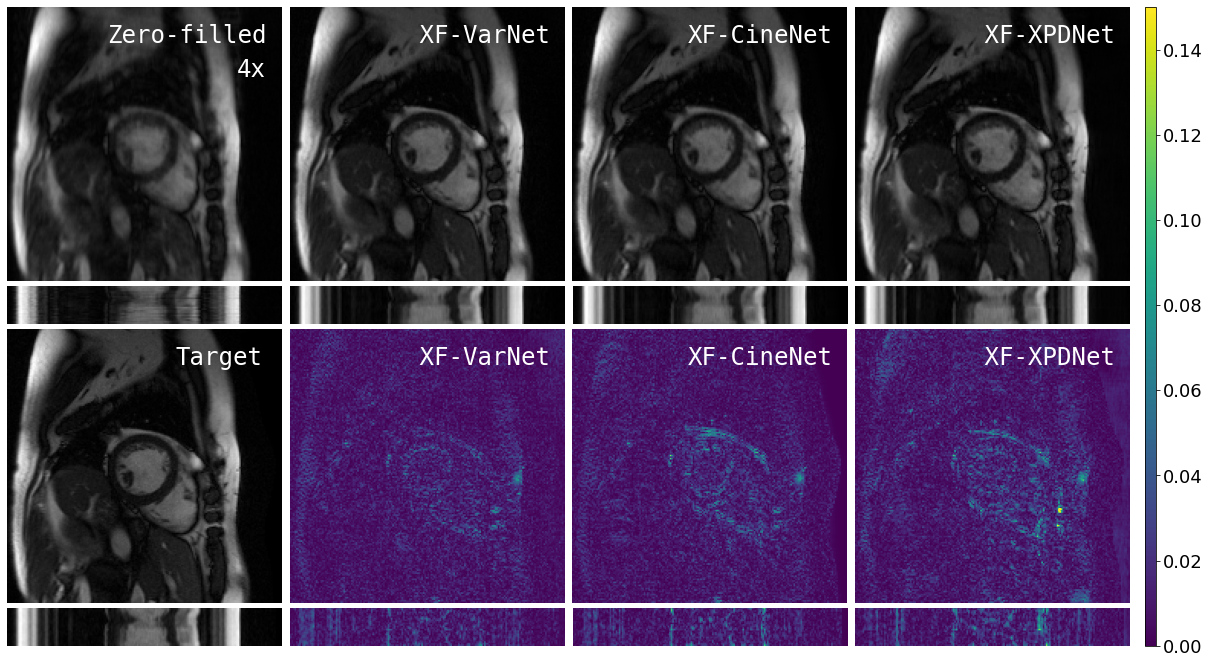

In [2]:
import numpy as np
import matplotlib.pyplot as plt

PATH = '/path/to/results'

zero_filled1 = np.load(PATH + '/varnet/XF_4x/zero_filled_sax_00001.h5.npy')
zero_filled2 = np.load(PATH + '/varnet/XF_4x/zero_filled_sax_00002.h5.npy')
zero_filled = np.concatenate([zero_filled1, zero_filled2[-10:]], axis=0)

target1 = np.load(PATH + '/cinenet/XF_4x/target_sax_00001.h5.npy')
target2 = np.load(PATH + '/cinenet/XF_4x/target_sax_00002.h5.npy')
target = np.concatenate([target1, target2[-10:]], axis=0)

output_varnet1 = np.load(PATH + '/varnet/XF_4x/output_varnet_sax_00001.h5.npy')
output_varnet2 = np.load(PATH + '/varnet/XF_4x/output_varnet_sax_00002.h5.npy')
output_varnet = np.concatenate([output_varnet1, output_varnet2[-10:]], axis=0)

output_cinenet1 = np.load(PATH + '/cinenet/XF_4x/output_cinenet_sax_00001.h5.npy')
output_cinenet2 = np.load(PATH + '/cinenet/XF_4x/output_cinenet_sax_00002.h5.npy')
output_cinenet = np.concatenate([output_cinenet1, output_cinenet2[-10:]], axis=0)

output_xpdnet1 = np.load(PATH + '/xpdnet/XF_4x/output_xpdnet_sax_00001.h5.npy')
output_xpdnet2 = np.load(PATH + '/xpdnet/XF_4x/output_xpdnet_sax_00002.h5.npy')
output_xpdnet = np.concatenate([output_xpdnet1, output_xpdnet2[-10:]], axis=0)

slice_n = 1   # For x-y plane view
row_n = 85    # For x-t plane view

titles = ['Zero-filled', ' XF-VarNet', 'XF-CineNet', ' XF-XPDNet']
images = [zero_filled, output_varnet, output_cinenet, output_xpdnet]

text_dict = {'color': 'white',
             'fontsize': 24,
             'fontfamily': 'monospace',
            }

fig, axs = plt.subplots(4, 4, sharex=True, sharey=False, gridspec_kw={'height_ratios': [1, 0.1388, 1, 0.1388]}, figsize=(24, 11.75))
fig.subplots_adjust(hspace=0.03)
fig.subplots_adjust(wspace=0.03)

for i, (title, image) in enumerate(zip(titles, images)):
    # First row: x-y images
    axs[0,i].imshow(image[slice_n]/image[slice_n].max(), cmap = 'gray')
    axs[0,i].axis('off')
    if i==0:
      axs[0,i].text(65, 23, title, text_dict)
    else:
      axs[0,i].text(75, 23, title, text_dict)
    
    # Second row: x-t images
    axs[1,i].imshow(image[:,row_n]/image[:,row_n].max(), cmap = 'gray')
    axs[1,i].axis('off')


for i, (title, image) in enumerate(zip(titles, images)):
    if i == 0:
      axs[2,i].imshow(target[slice_n]/target[slice_n].max(), cmap = 'gray')
      axs[2,i].axis('off')
      axs[2,i].text(110, 23, 'Target', text_dict)
      axs[3,i].imshow(target[:,row_n]/target[:,row_n].max(), cmap = 'gray')
      axs[3,i].axis('off')
    else:
      # Third row: x-y errors
      image /= image.max()
      target /= target.max()
      error = np.abs(image[slice_n]-target[slice_n])
      u=axs[2,i].imshow(error, vmin=0., vmax=0.15, cmap='viridis')
      axs[2,i].axis('off')
      axs[2,i].text(75, 23, title, text_dict)

      # Fourth row: x-y errors
      time_error = np.abs(image[:,row_n]-target[:,row_n])
      axs[3,i].imshow(time_error, vmin=0., vmax=0.15, cmap='viridis')
      axs[3,i].axis('off')

axs[0,0].text(150, 45, '4x', text_dict)
      
cbar = fig.colorbar(u, ax=axs.ravel().tolist(), aspect=60, shrink=1, pad = 0.012)
cbar.ax.tick_params(labelsize=18)
plt.show()

# Reconstruction close-up of anatomy of interest

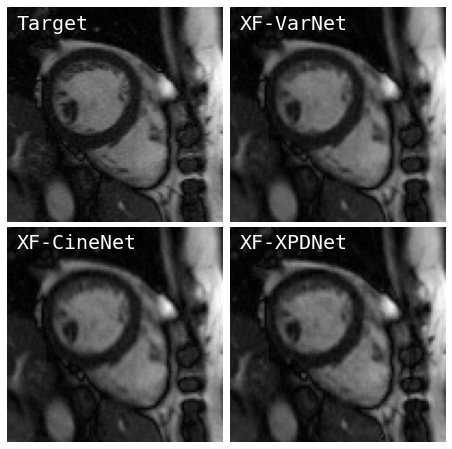

In [3]:
titles = [('Target', 'XF-VarNet'), ('XF-CineNet', 'XF-XPDNet')]
images = [(target, output_varnet), (output_cinenet, output_xpdnet)]

slice_n = 1

text_dict = {'color': 'white',
             'fontsize': 20,
             'fontfamily': 'monospace',
            }

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(8, 8))
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.0001)

for i, (title, image) in enumerate(zip(titles, images)):
    img1, img2 = image
    title1, title2 = title

    img1 = img1[slice_n, 50:-30, 50:-30]  # Close-up region
    img2 = img2[slice_n, 50:-30, 50:-30]

    axs[i,0].imshow(img1/img1.max(), cmap = 'gray')
    axs[i,0].axis('off')
    axs[i,1].imshow(img2/img2.max(), cmap = 'gray')
    axs[i,1].axis('off')

    if title1=='Target':
      axs[i,0].text(4, 10, title1, text_dict)
      axs[i,1].text(4, 10, title2, text_dict)
    else:
      axs[i,0].text(4, 10, title1, text_dict)
      axs[i,1].text(4, 10, title2, text_dict)

plt.show()

# Comparison of all VarNet model dynamics at 8x acceleration

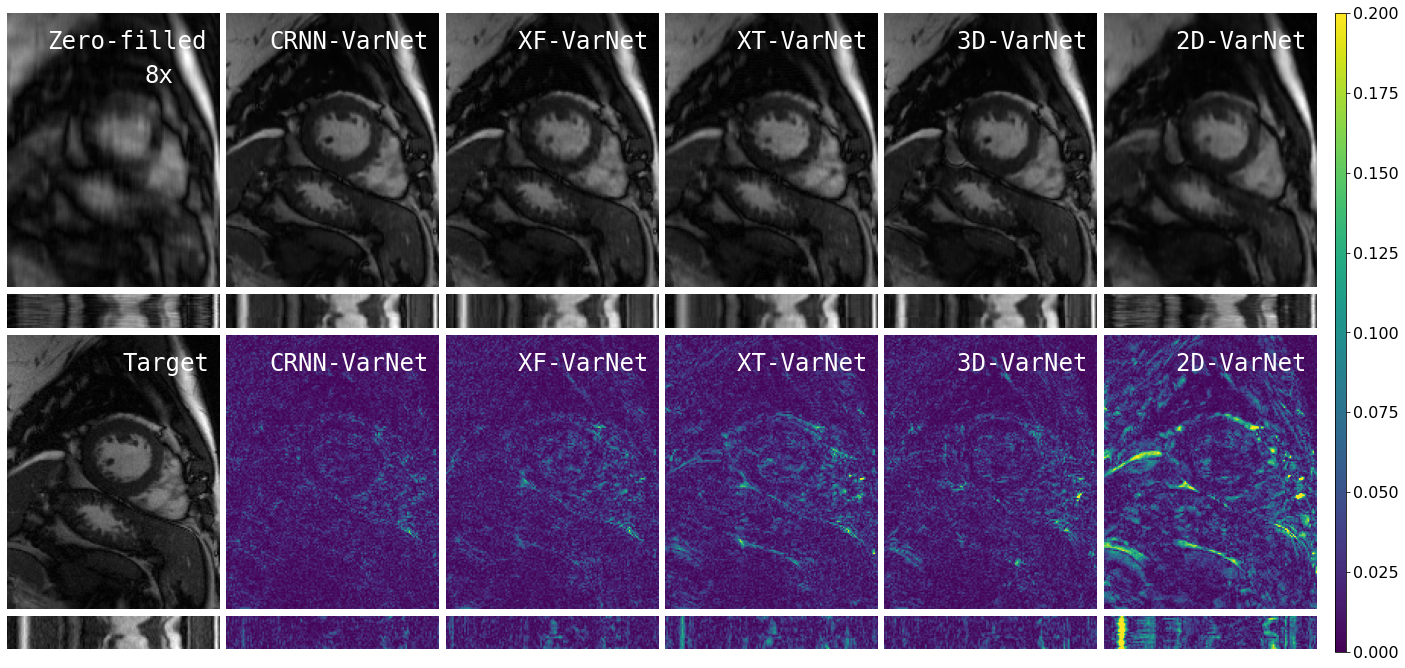

In [4]:
zero_filled1 = np.load(PATH + '/varnet/XF_8x/zero_filled_sax_00003.h5.npy')
zero_filled2 = np.load(PATH + '/varnet/XF_8x/zero_filled_sax_00004.h5.npy')
zero_filled = np.concatenate([zero_filled1, zero_filled2[-7:]], axis=0)

target1 = np.load(PATH + '/varnet/XF_8x/target_sax_00003.h5.npy')
target2 = np.load(PATH + '/varnet/XF_8x/target_sax_00004.h5.npy')
target = np.concatenate([target1, target2[-7:]], axis=0)

output_2D_varnet1 = np.load(PATH + '/varnet/2D_8x/output_varnet_sax_00003.h5.npy')
output_2D_varnet2 = np.load(PATH + '/varnet/2D_8x/output_varnet_sax_00004.h5.npy')
output_2D_varnet = np.concatenate([output_2D_varnet1, output_2D_varnet2[-7:]], axis=0)

output_3D_varnet1 = np.load(PATH + '/varnet/3D_8x/output_varnet_sax_00003.h5.npy')
output_3D_varnet2 = np.load(PATH + '/varnet/3D_8x/output_varnet_sax_00004.h5.npy')
output_3D_varnet = np.concatenate([output_3D_varnet1, output_3D_varnet2[-7:]], axis=0)

output_XT_varnet1 = np.load(PATH + '/varnet/XT_8x/output_varnet_sax_00003.h5.npy')
output_XT_varnet2 = np.load(PATH + '/varnet/XT_8x/output_varnet_sax_00004.h5.npy')
output_XT_varnet = np.concatenate([output_XT_varnet1, output_XT_varnet2[-7:]], axis=0)

output_XF_varnet1 = np.load(PATH + '/varnet/XF_8x/output_varnet_sax_00003.h5.npy')
output_XF_varnet2 = np.load(PATH + '/varnet/XF_8x/output_varnet_sax_00004.h5.npy')
output_XF_varnet = np.concatenate([output_XF_varnet1, output_XF_varnet2[-7:]], axis=0)

output_CRNN_varnet1 = np.load(PATH + '/varnet/CRNN_8x/output_varnet_sax_00003.h5.npy')
output_CRNN_varnet2 = np.load(PATH + '/varnet/CRNN_8x/output_varnet_sax_00004.h5.npy')
output_CRNN_varnet = np.concatenate([output_CRNN_varnet1, output_CRNN_varnet2[-7:]], axis=0)


slice_n = 1
row_n = 85
col_start, col_end = 15, -25

titles = ['Zero-filled', 'CRNN-VarNet', '  XF-VarNet', '  XT-VarNet', '  3D-VarNet', '  2D-VarNet']
images = [zero_filled, output_CRNN_varnet, output_XF_varnet, output_XT_varnet, \
          output_3D_varnet, output_2D_varnet]

text_dict = {'color': 'white',
             'fontsize': 24,
             'fontfamily': 'monospace',
            }

fig, axs = plt.subplots(4, 6, sharex=True, sharey=False, gridspec_kw={'height_ratios': [1, 0.1388, 1, 0.1388]}, figsize=(28, 11.75))
fig.subplots_adjust(hspace=0.03)
fig.subplots_adjust(wspace=0.03)

for i, (title, image) in enumerate(zip(titles, images)):
    # First row: x-y images
    img = image[slice_n, :, col_start:col_end]
    axs[0,i].imshow(img/img.max(), cmap = 'gray')
    axs[0,i].axis('off')
    if i==0:
      axs[0,i].text(26, 23, title, text_dict)
    else:
      axs[0,i].text(28, 23, title, text_dict)
    
    # Second row: x-t images
    imgt = image[:, row_n, col_start:col_end]
    axs[1,i].imshow(imgt/image[:,row_n].max(), cmap = 'gray')
    axs[1,i].axis('off')


for i, (title, image) in enumerate(zip(titles, images)):
    if i == 0:
      tg = target[slice_n, :, col_start:col_end]
      tgt = target[:, row_n, col_start:col_end]
      axs[2,i].imshow(tg/tg.max(), cmap = 'gray')
      axs[2,i].axis('off')
      axs[2,i].text(75, 23, 'Target', text_dict)
      axs[3,i].imshow(tgt/tgt.max(), cmap = 'gray')
      axs[3,i].axis('off')
    else:
      # Third row: x-y errors
      image /= image.max()
      target /= target.max()
      error = np.abs(image[slice_n, :, col_start:col_end] -\
                     target[slice_n, :, col_start:col_end])
      u=axs[2,i].imshow(error, vmin=0., vmax=0.2, cmap='viridis')
      axs[2,i].axis('off')
      axs[2,i].text(28, 23, title, text_dict)

      # Fourth row: x-y errors
      time_error = np.abs(image[:, row_n, col_start:col_end] -\
                          target[:, row_n, col_start:col_end])
      axs[3,i].imshow(time_error, vmin=0., vmax=0.2, cmap='viridis')
      axs[3,i].axis('off')

axs[0,0].text(90, 45, '8x', text_dict)
      
cbar = fig.colorbar(u, ax=axs.ravel().tolist(), aspect=60, shrink=1, pad = 0.012)
cbar.ax.tick_params(labelsize=16)
plt.show()

# Reconstruction close-up of anatomy of interest

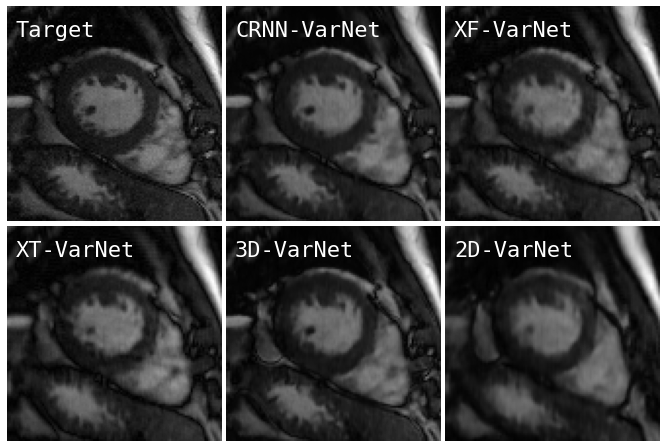

In [5]:
titles = [('Target', 'CRNN-VarNet', 'XF-VarNet'), ('XT-VarNet', '3D-VarNet', '2D-VarNet')]
images = [(target, output_CRNN_varnet, output_XF_varnet), (output_XT_varnet, \
          output_3D_varnet, output_2D_varnet)]

slice_n = 1

text_dict = {'color': 'white',
             'fontsize': 22,
             'fontfamily': 'monospace',
            }

fig, axs = plt.subplots(2, 3, sharex=True, sharey=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(11.7, 8))
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)

for i, (title, image) in enumerate(zip(titles, images)):
    img1, img2, img3 = image
    title1, title2, title3 = title

    img1 = img1[slice_n, 30:-40, 40:-30]
    img2 = img2[slice_n, 30:-40, 40:-30]
    img3 = img3[slice_n, 30:-40, 40:-30]

    axs[i,0].imshow(img1/img1.max(), cmap = 'gray')
    axs[i,0].axis('off')
    axs[i,0].text(4, 15, title1, text_dict)
    axs[i,1].imshow(img2/img2.max(), cmap = 'gray')
    axs[i,1].axis('off')
    axs[i,1].text(4, 15, title2, text_dict)
    axs[i,2].imshow(img3/img3.max(), cmap = 'gray')
    axs[i,2].axis('off')
    axs[i,2].text(4, 15, title3, text_dict)

plt.show()